# Disease prediction using deep learning

In an era where Machine Learning and Deep Learning are experiencing substantial growth, it is crucial to recognize that this advanced knowledge must be applied meaningfully across various fields to truly benefit humanity.

This project harnesses the power of deep learning effectively by deploying it within the medical field. The primary goal is to simplify the tasks of healthcare professionals. Our dataset comprises 132 parameters, facilitating the prediction of 42 distinct diseases.

We are evaluating the performance of two deep learning models on a provided test dataset within the framework of this project. This not only demonstrates the practical application of theoretical knowledge but also aims to enhance diagnostic accuracy and efficiency in medical practice.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-04-24 14:46:59.794617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 14:46:59.794736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 14:46:59.923132: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading data

In [2]:
df = pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")
df1 = pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")
df.drop('Unnamed: 133', axis=1, inplace=True)
df1.drop('Unnamed: 133', axis=1, inplace=True)

final_test_df = pd.read_csv("../input/disease-prediction-using-machine-learning/Testing.csv")

# Exploratory data analysis

In [3]:
print(df.describe())
print('---------------------------------------------------------------')
print(df.info())
print('---------------------------------------------------------------')
column_names = df.columns.tolist()

print(column_names)

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

**Dataset Overview:**

Total Entries: 4,920 rows

Total Columns: 133

**Column Details:**

Names of Columns: Some of the columns include itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, among others.

Data Types: The dataset consists of 132 integer columns and 1 text column (prognosis).

**Statistical Summary:**

For each column, the dataset provides the following statistical metrics: count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

In [4]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

In [6]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
df.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

# Data Visualization

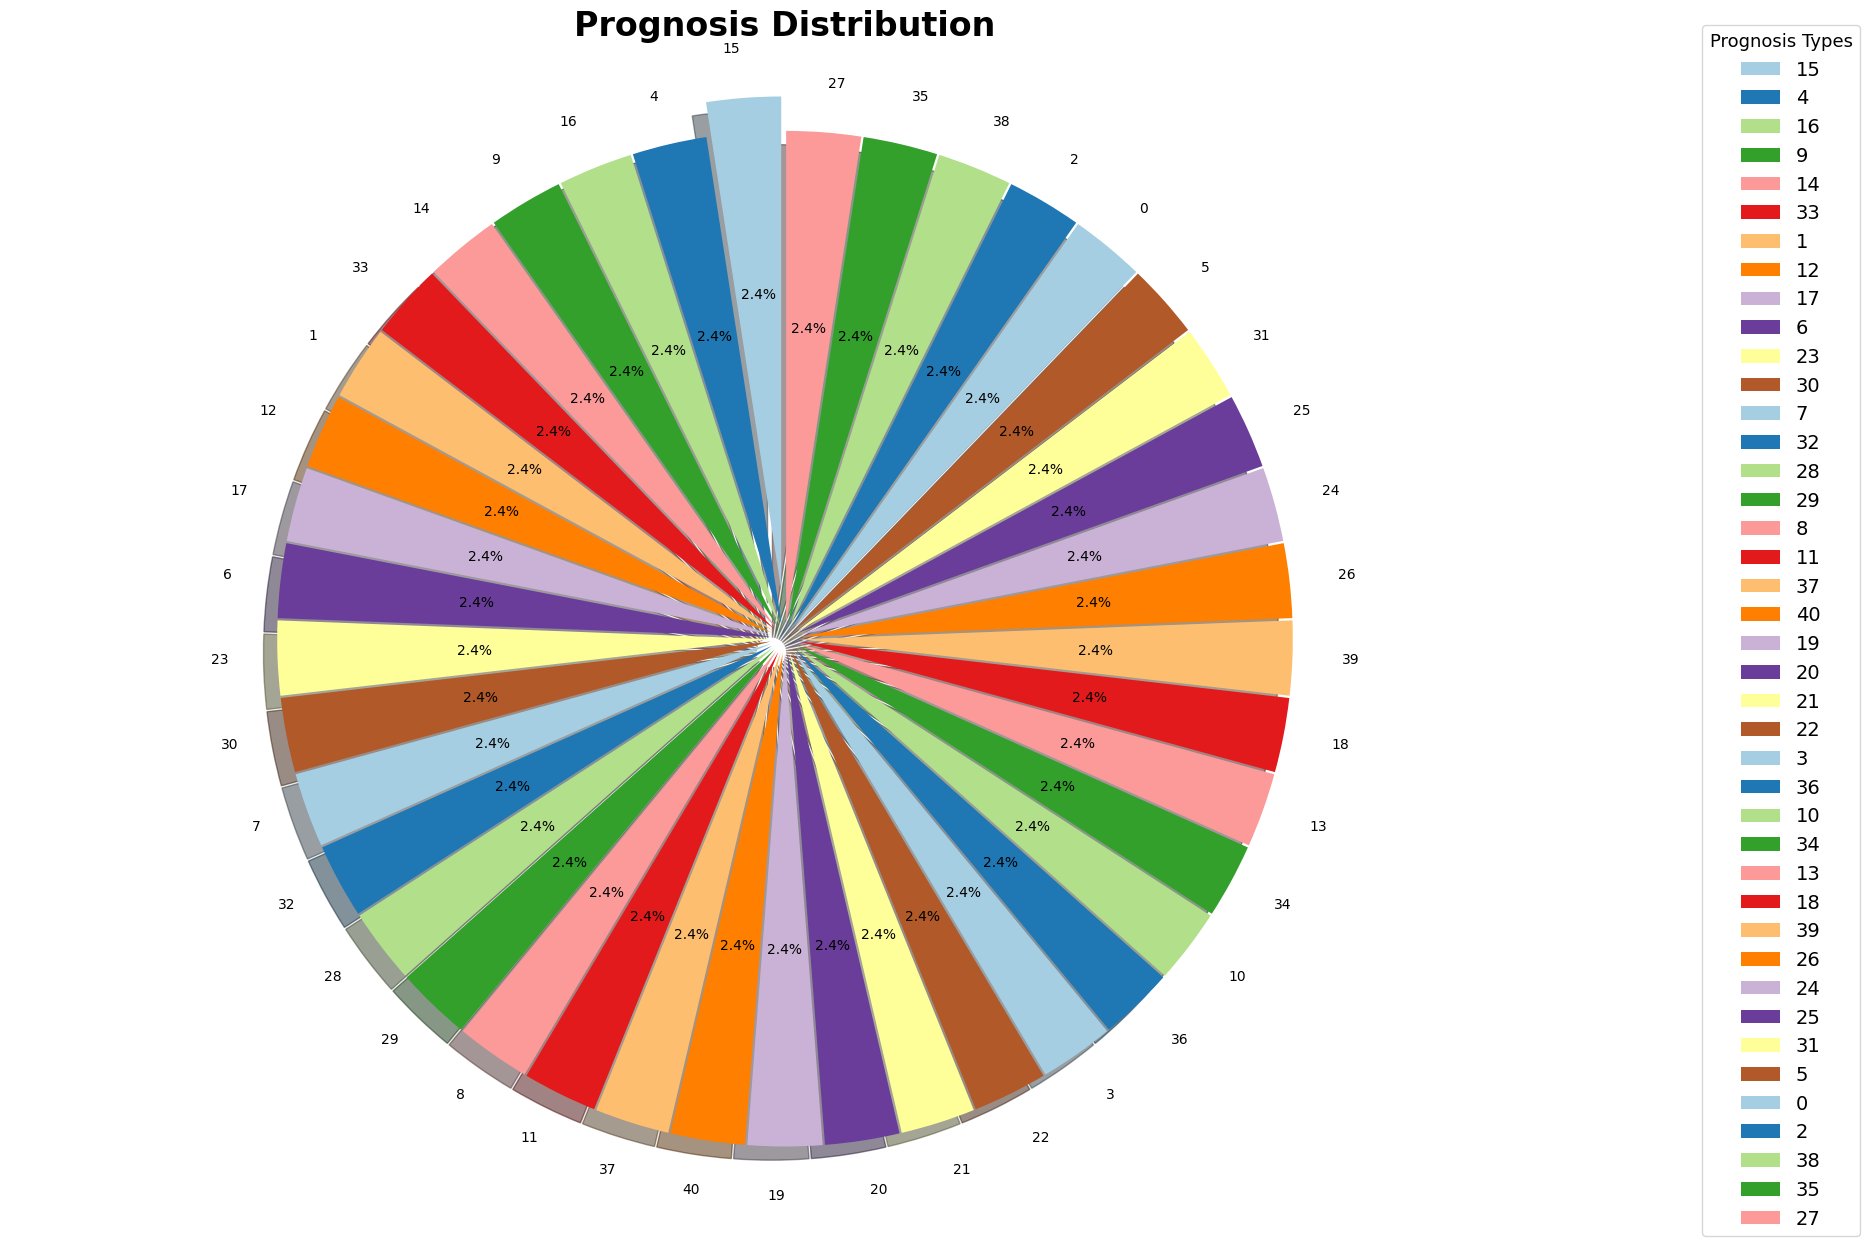

In [29]:
plt.figure(figsize=(20, 15))  

# Compute category counts
category_counts = df['prognosis'].value_counts()

explode = [0.1 if i == category_counts.idxmax() else 0.03 for i in category_counts.index]

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode,
        colors=plt.cm.Paired.colors)  

plt.title('Prognosis Distribution', fontsize=24, fontweight='bold')

plt.legend(category_counts.index, title="Prognosis Types", loc='upper right', 
           fontsize=14, title_fontsize='13', bbox_to_anchor=(1.2, 1.025))

plt.axis('equal')

# Display the chart
plt.show()


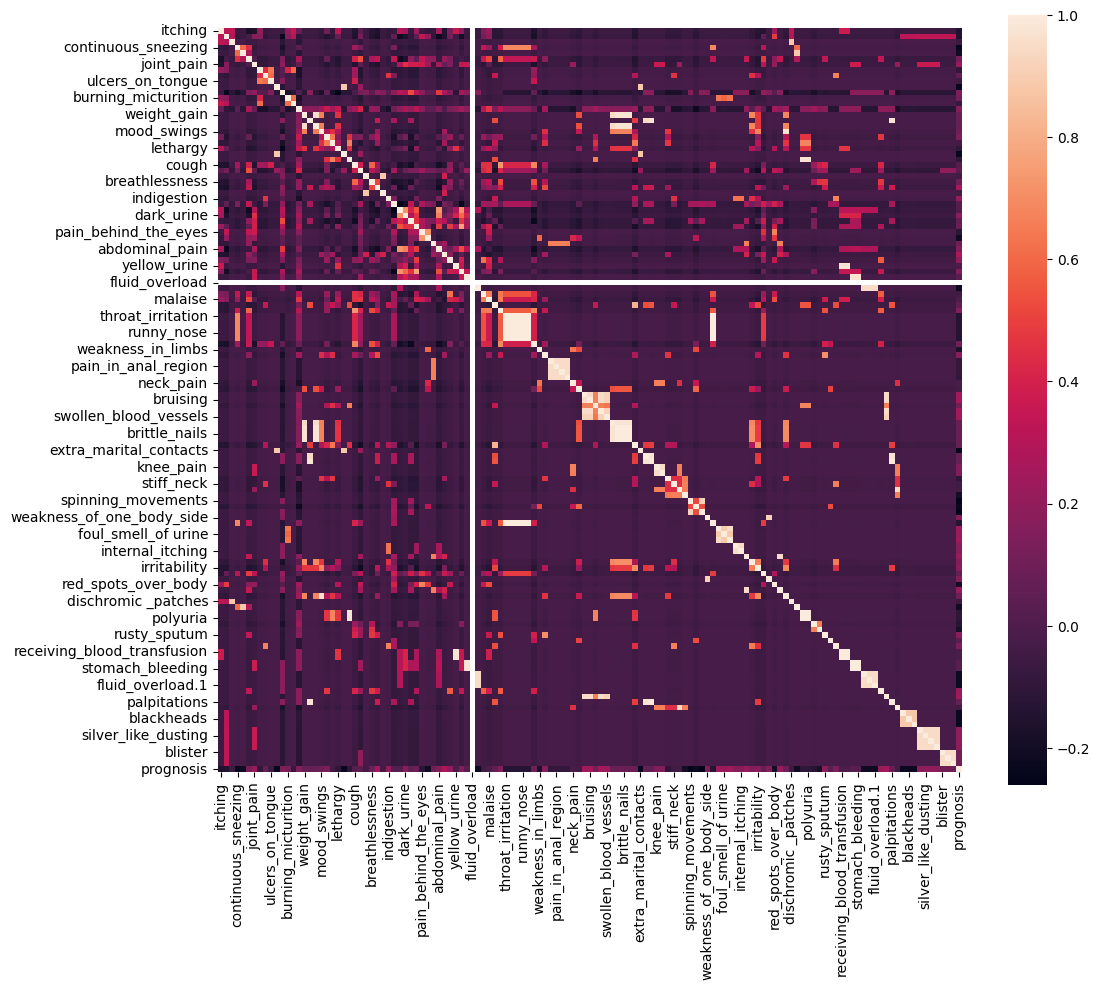

In [30]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

corrmat = df.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

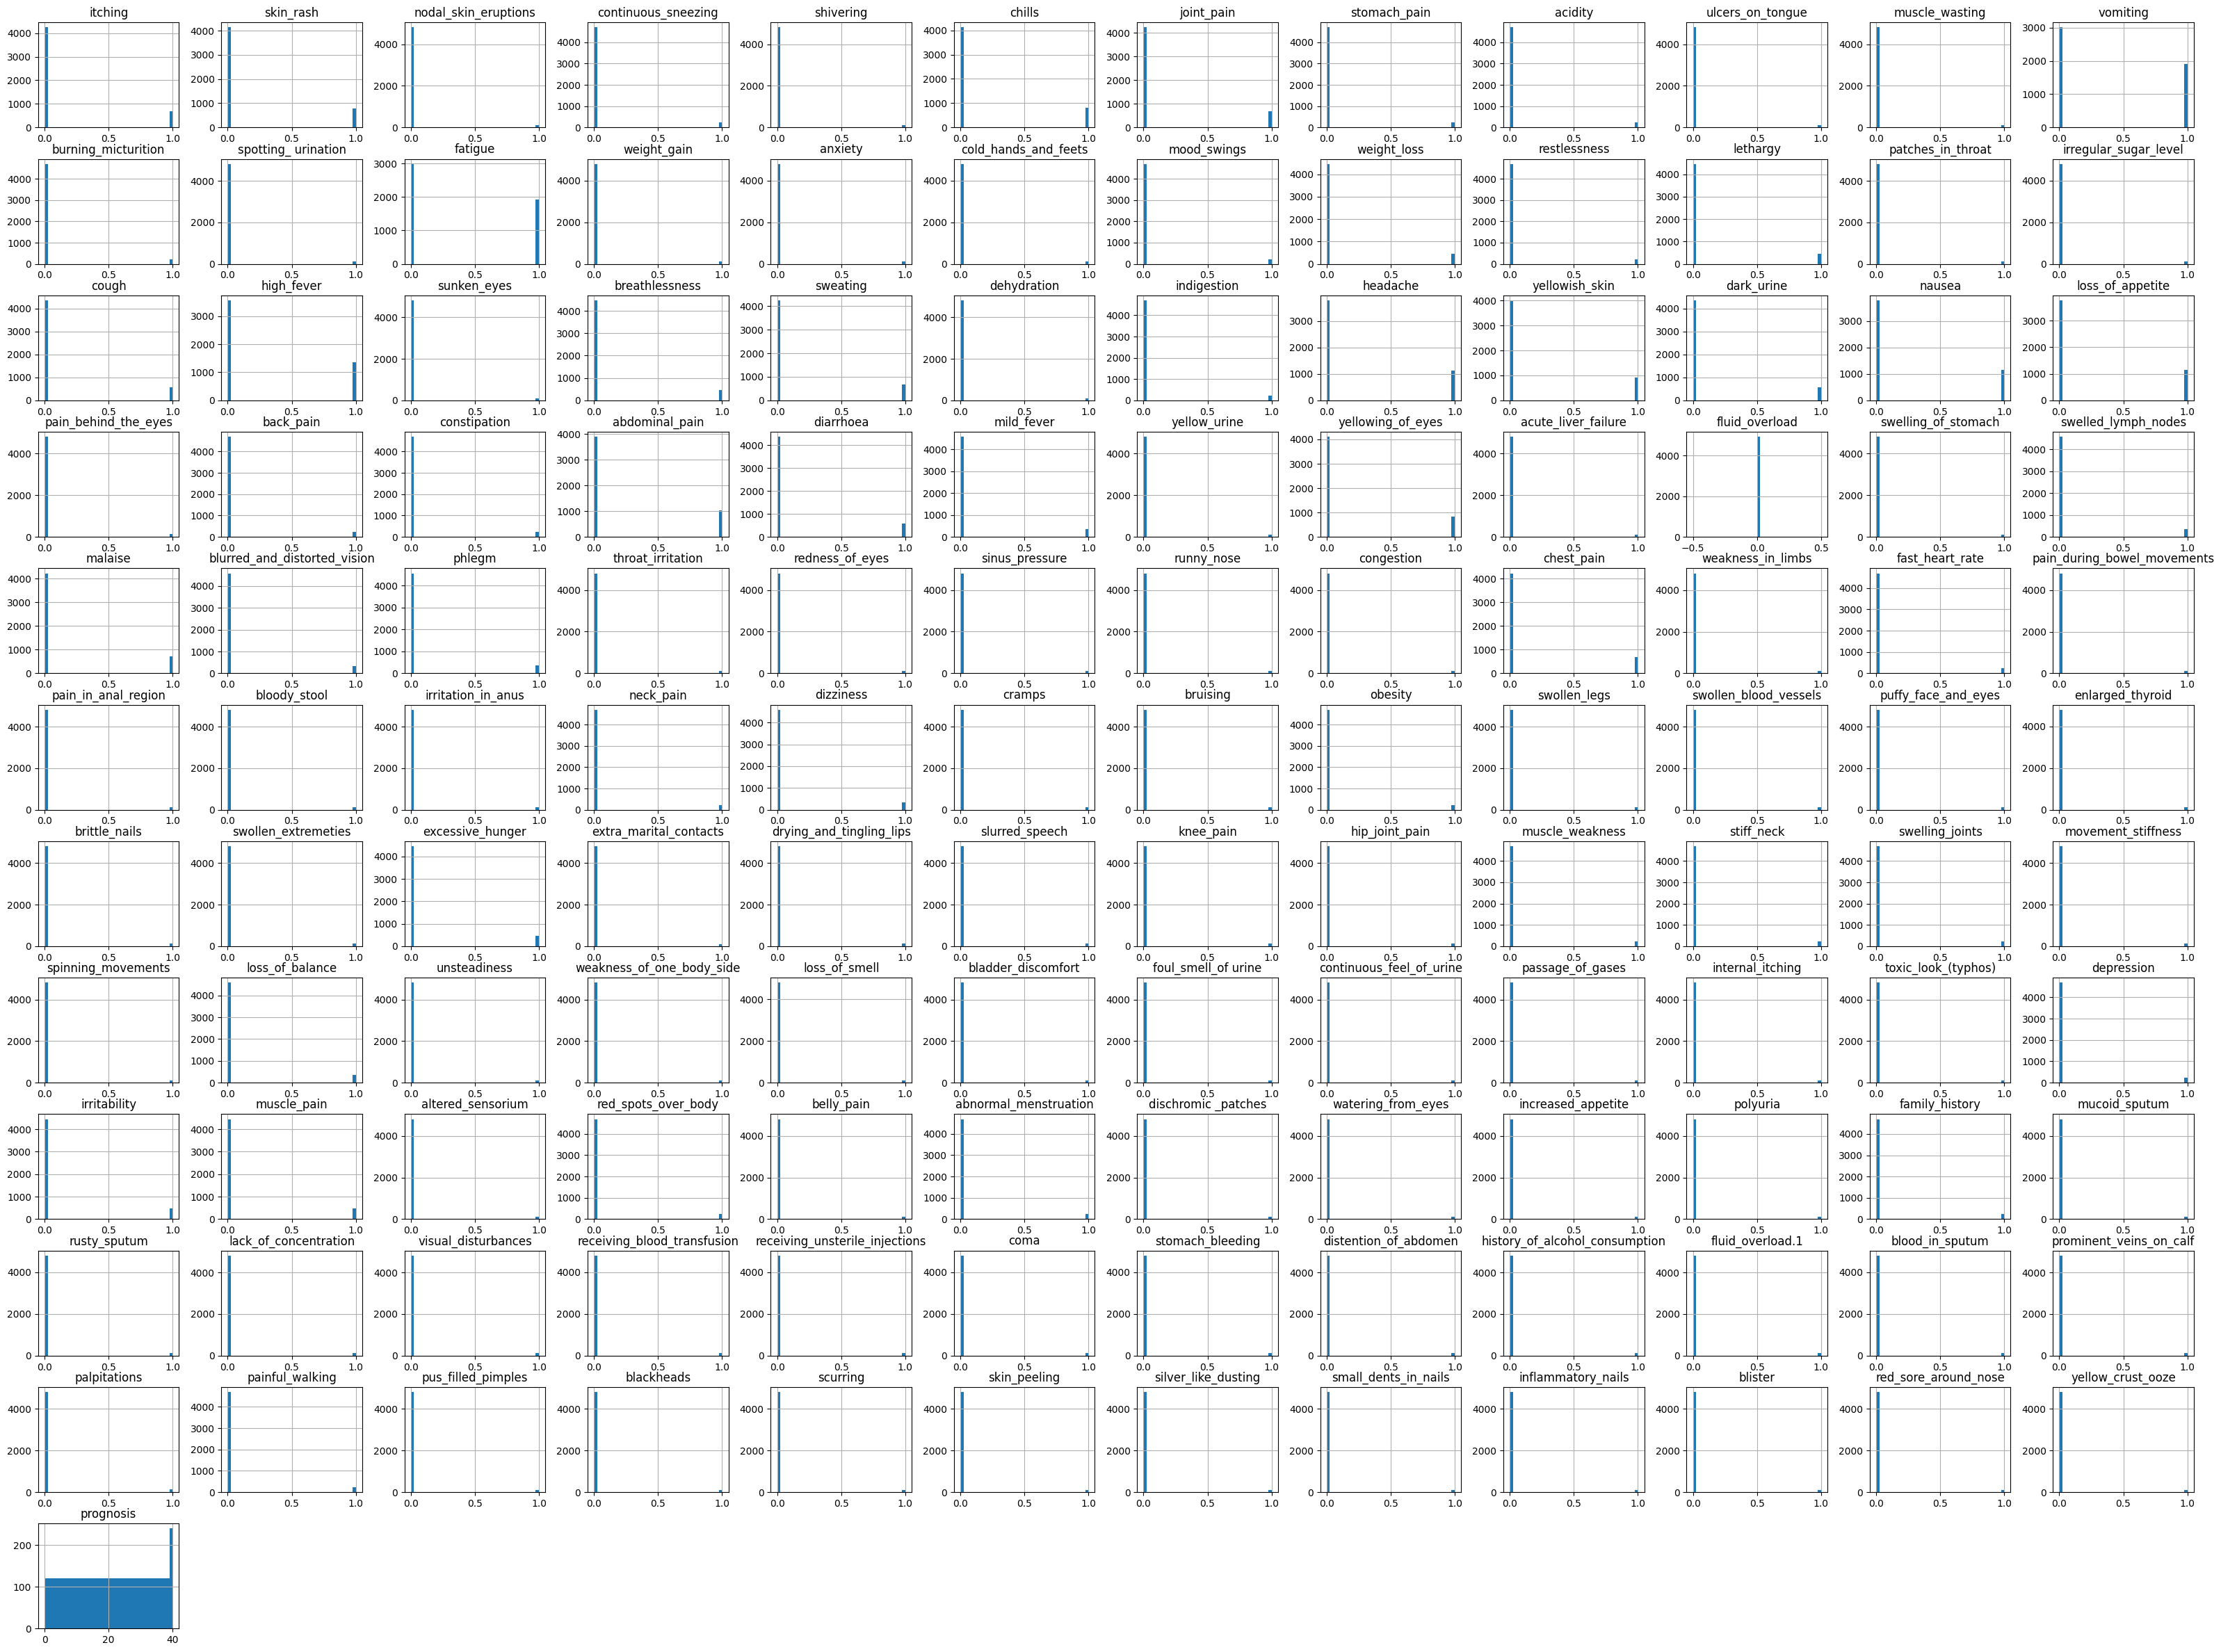

In [31]:
df.hist(bins=40, figsize=(40,30))
plt.show()

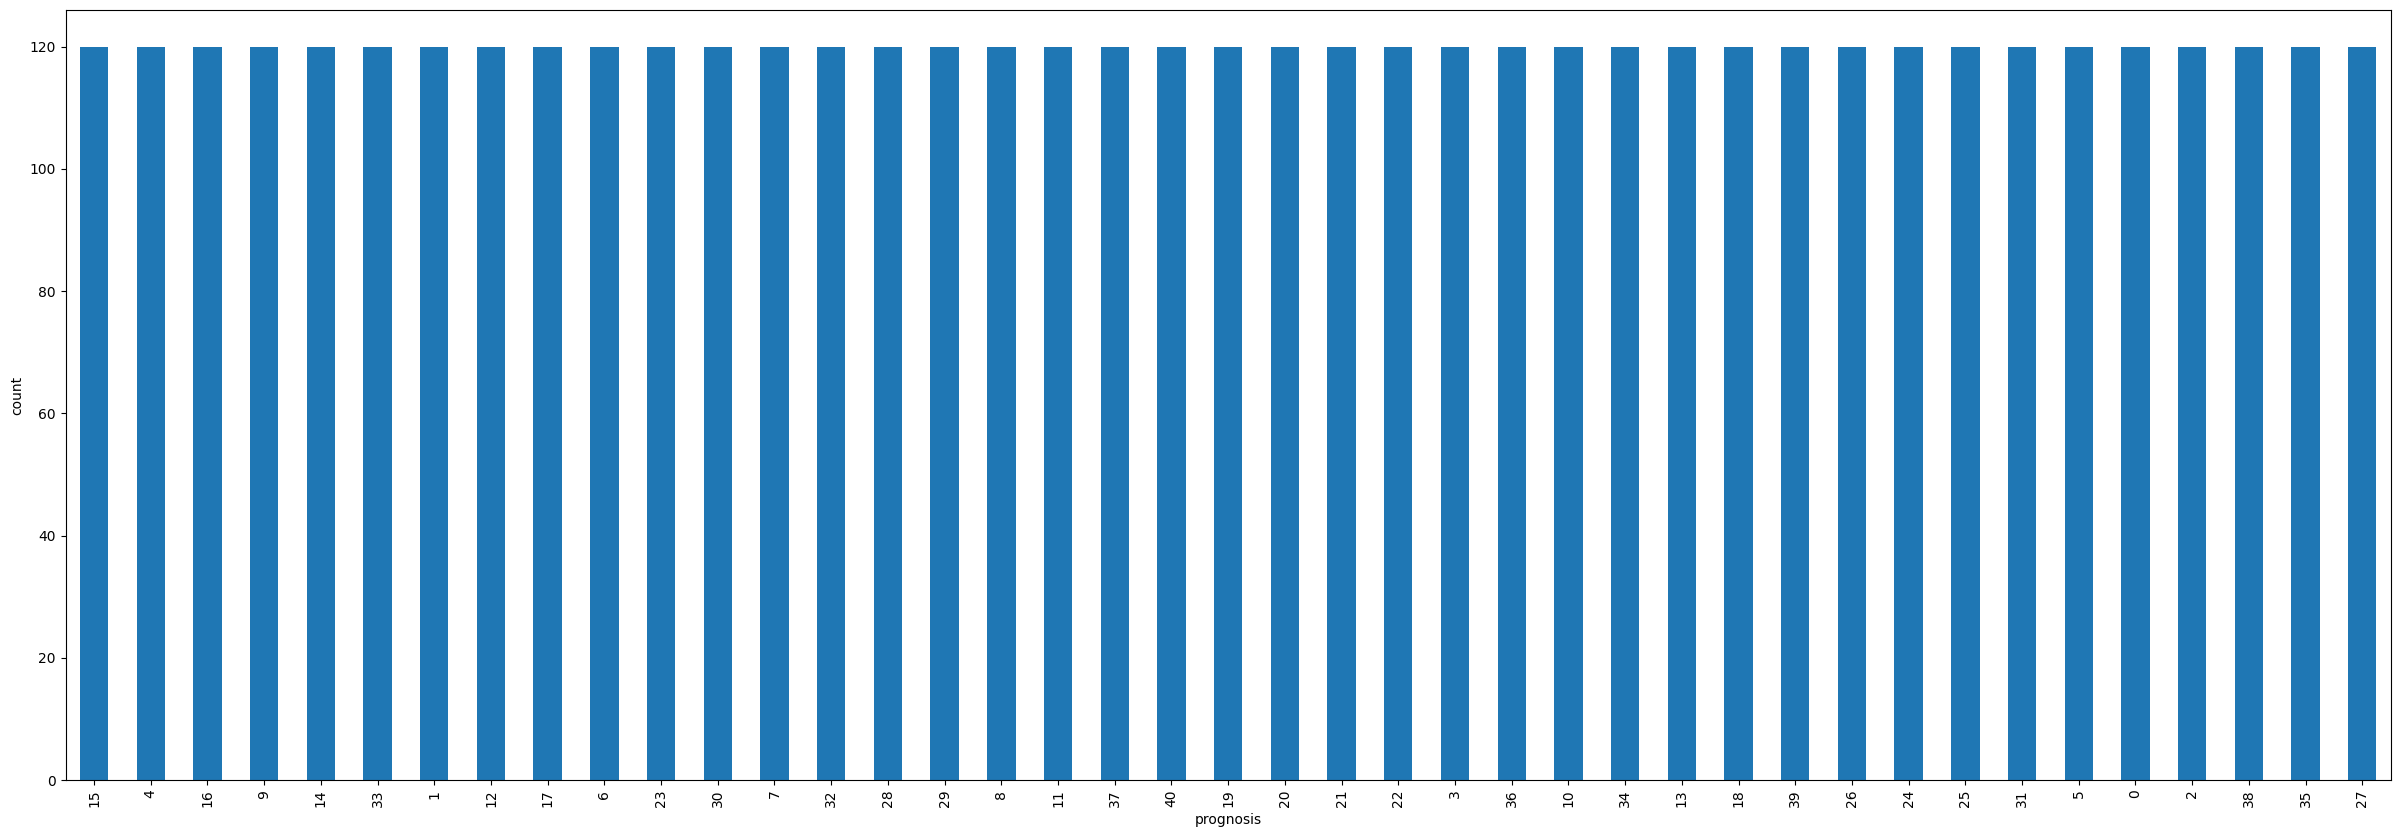

In [ ]:
plt.figure(figsize=(30,10))
(df['prognosis'].value_counts()).plot(kind='bar',ylabel="count")

<Axes: title={'center': 'Top 10 most common symptoms'}, xlabel='Symtoms', ylabel='Number of diseases'>

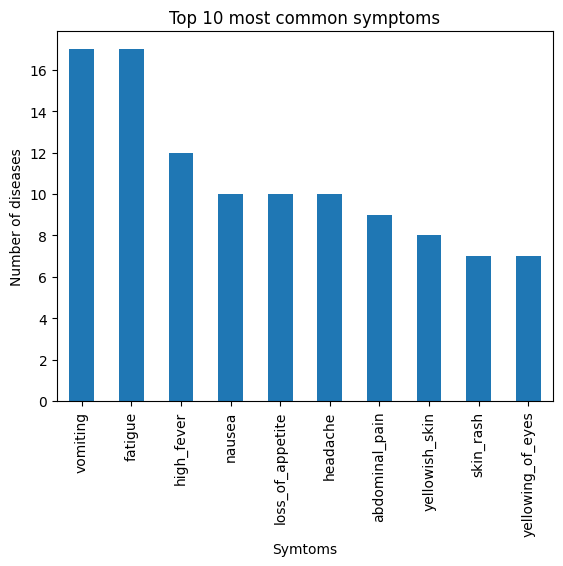

In [ ]:
(df.groupby('prognosis').sum()>0).sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 most common symptoms',xlabel="Symtoms",ylabel="Number of diseases")

# Data Preperation for the model

In [ ]:
X = df1.drop('prognosis', axis=1)
y = df1['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape

(3936,)

In [ ]:
y_test.shape

(984,)

In [ ]:
X_train.shape

(3936, 132)

In [ ]:
X_test.shape

(984, 132)

In [ ]:
y_train_enc= pd.get_dummies(y_train).astype(int)
y_train_enc

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
1807,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_enc.shape

(3936, 41)

In [ ]:
y_test_enc= pd.get_dummies(y_test).astype(int)

# Model Architecture for first model


**Input Layer:**

input_shape=(X_train.shape[1],): This specifies the shape of the input data that the model expects. Each input sample is a vector of features with a length equal to the number of columns in X_train (minus the target column if it's included in X_train). This shape determines how many input neurons are in the first layer of the model.

**Hidden Layers:**

Dense(4, activation='relu'): The first hidden layer has 4 neurons, using ReLU (Rectified Linear Unit) as the activation function. It receives inputs from the input layer defined implicitly by the input shape.

Dense(8, activation='relu'): The second hidden layer reduces the number of neurons to 8, continuing with ReLU activation. It connects to the first hidden layer's outputs.


**Output Layer:**

Dense(y_train_enc.shape[1], activation='softmax'): The output layer has neurons equal to the number of columns in y_train_enc, which corresponds to the number of classes or unique labels in the target data after one-hot encoding. The softmax activation function is used to output a probability distribution over the classes, making it suitable for multi-class classification tasks.


**Model Training:**

**Compilation:**


loss='categorical_crossentropy': This loss function is suitable for multi-class classification problems where labels are one-hot encoded.

metrics=['accuracy']: The model's performance will be evaluated based on accuracy.

**Early Stopping Callback:**

EarlyStopping(patience=2, monitor='val_accuracy'): This callback will monitor the validation accuracy during training. If the validation accuracy does not improve for two consecutive epochs, training will be halted prematurely. This helps in preventing overfitting and saves computational resources.

**Fitting the Model:**

model.fit(X_train, y_train_enc, batch_size=120, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor]): Here, the model is trained on X_train with labels y_train_enc using mini-batches of size 120 for a maximum of 20 epochs. 

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(y_train_enc.shape[1], activation='softmax')
])

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │           532 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 41)             │           369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 941 (3.68 KB)

 Trainable params: 941 (3.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with optimizer, loss function, and metrics
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.compile( loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping monitor
early_stopping_monitor = EarlyStopping(patience=2, monitor='val_accuracy')

# Train the model with training data, validation split, and callbacks for early stopping
history  = model.fit(X_train, y_train_enc, batch_size=120, epochs=20, 
          validation_data=(X_test, y_test_enc), callbacks=[early_stopping_monitor])

Epoch 1/20
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0085 - loss: 3.6987 

I0000 00:00:1713970062.767622     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.0097 - loss: 3.6974 - val_accuracy: 0.0528 - val_loss: 3.6552
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0768 - loss: 3.6380 - val_accuracy: 0.1291 - val_loss: 3.5794
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1434 - loss: 3.5563 - val_accuracy: 0.1301 - val_loss: 3.4791
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1526 - loss: 3.4557 - val_accuracy: 0.1372 - val_loss: 3.3560
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1672 - loss: 3.3221 - val_accuracy: 0.1809 - val_loss: 3.2197
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1982 - loss: 3.1857 - val_accuracy: 0.2053 - val_loss: 3.0771
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2425 - loss: 3.0450 - val_accuracy: 0.2652 - val_loss: 2.9293
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2638 - loss: 2.8907 - val_accuracy: 0.2876 - val_loss: 2.7817
Ep

In [ ]:
def plot_model_accuracy(history):
    """Plot model accuracy on both training and validation datasets."""
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

def plot_model_loss(history):
    """Plot model loss on both training and validation datasets."""
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()



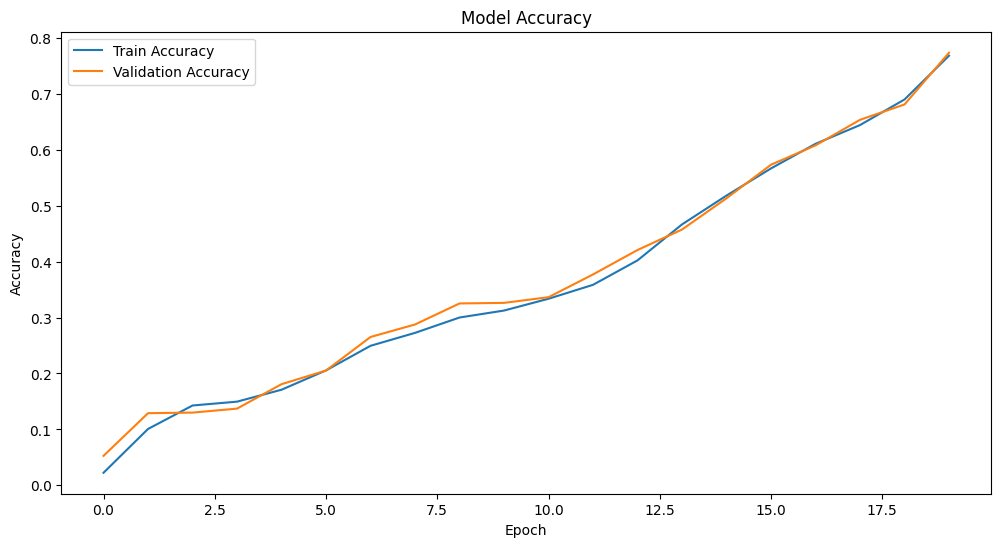

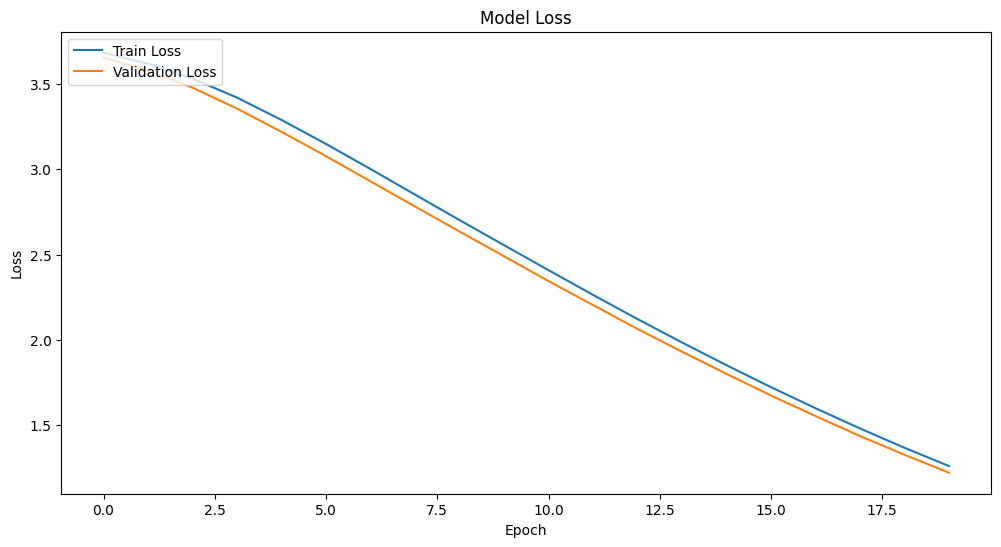

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

**Test first model on the test data provided to us**

In [ ]:
X_test_final = final_test_df.drop('prognosis', axis=1)
predictions = model.predict(X_test_final)
predicted_classes = predictions.argmax(axis=1)


class_names = y_train_enc.columns.tolist()
predicted_labels = [class_names[index] for index in predicted_classes]

predicted_labels

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


['Fungal infection',
 'Acne',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Bronchial Asthma',
 'Hypertension ',
 'Hypoglycemia',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Hyperthyroidism',
 'Typhoid',
 'Chronic cholestasis',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Typhoid',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Osteoarthristis',
 'Impetigo',
 'Dimorphic hemmorhoids(piles)']

In [ ]:
actual_labels = final_test_df['prognosis']
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generate a detailed classification report
class_report = classification_report(actual_labels, predicted_labels)
print("Classification Report:\n", class_report)


Accuracy: 0.8095238095238095
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.50      1.00      0.67         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      1.00      0.67         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.00      0.00      0.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00        

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Second model with Hyperparameter tuning and more layers

**Input Layer:**

input_shape=(X_train.shape[1],): This specifies the shape of the input data that the model expects. Each input sample is a vector of features with a length equal to the number of columns in X_train (minus the target column if it's included in X_train). This shape determines how many input neurons are in the first layer of the model.

**Hidden Layers:**

Dense(64, activation='relu'): The first hidden layer has 64 neurons, using ReLU (Rectified Linear Unit) as the activation function. It receives inputs from the input layer defined implicitly by the input shape.

Dense(32, activation='relu'): The second hidden layer reduces the number of neurons to 32, continuing with ReLU activation. It connects to the first hidden layer's outputs.

Dense(16, activation='relu'): The third hidden layer further reduces the neurons to 16, maintaining ReLU activation.

**Output Layer:**

Dense(y_train_enc.shape[1], activation='softmax'): The output layer has neurons equal to the number of columns in y_train_enc, which corresponds to the number of classes or unique labels in the target data after one-hot encoding. The softmax activation function is used to output a probability distribution over the classes, making it suitable for multi-class classification tasks.


**Model Training:**

**Compilation:**

optimizer='adam': Uses the Adam optimizer

loss='categorical_crossentropy': This loss function is suitable for multi-class classification problems where labels are one-hot encoded.

metrics=['accuracy']: The model's performance will be evaluated based on accuracy.

**Early Stopping Callback:**

EarlyStopping(patience=2, monitor='val_accuracy'): This callback will monitor the validation accuracy during training. If the validation accuracy does not improve for two consecutive epochs, training will be halted prematurely. This helps in preventing overfitting and saves computational resources.

**Fitting the Model:**

model.fit(X_train, y_train_enc, batch_size=120, epochs=20, callbacks=[early_stopping_monitor]): Here, the model is trained on X_train with labels y_train_enc using mini-batches of size 120 for a maximum of 20 epochs. 

In [32]:
# Define the model architecture
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train_enc.shape[1], activation='softmax')
])

# Print model summary
model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 41)             │           697 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,817 (46.16 KB)

 Trainable params: 11,817 (46.16 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2, monitor='val_accuracy')
history2  = model2.fit(X_train, y_train_enc, batch_size=120, epochs=20, 
          validation_data=(X_test, y_test_enc), callbacks=[early_stopping_monitor])

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.0730 - loss: 3.6598 - val_accuracy: 0.1799 - val_loss: 3.4345
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 3.2981 - val_accuracy: 0.3821 - val_loss: 2.7348
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4244 - loss: 2.4914 - val_accuracy: 0.6341 - val_loss: 1.6799
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 1.4069 - val_accuracy: 0.9624 - val_loss: 0.7027
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9683 - loss: 0.5567 - val_accuracy: 0.9980 - val_loss: 0.2230
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.1688 - val_accuracy: 1.0000 - val_loss: 0.0805
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0678 - val_accuracy: 1.0000 - val_loss: 0.0394
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss

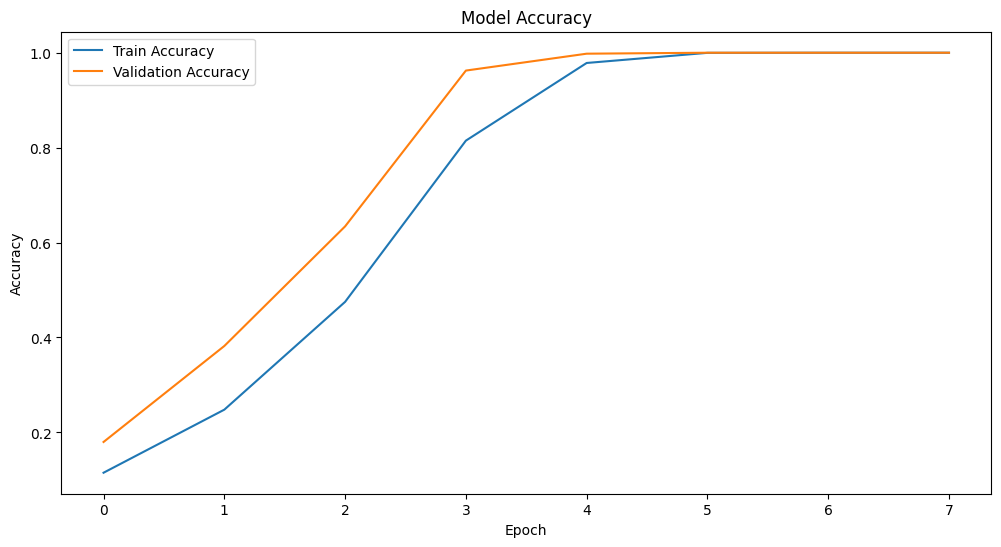

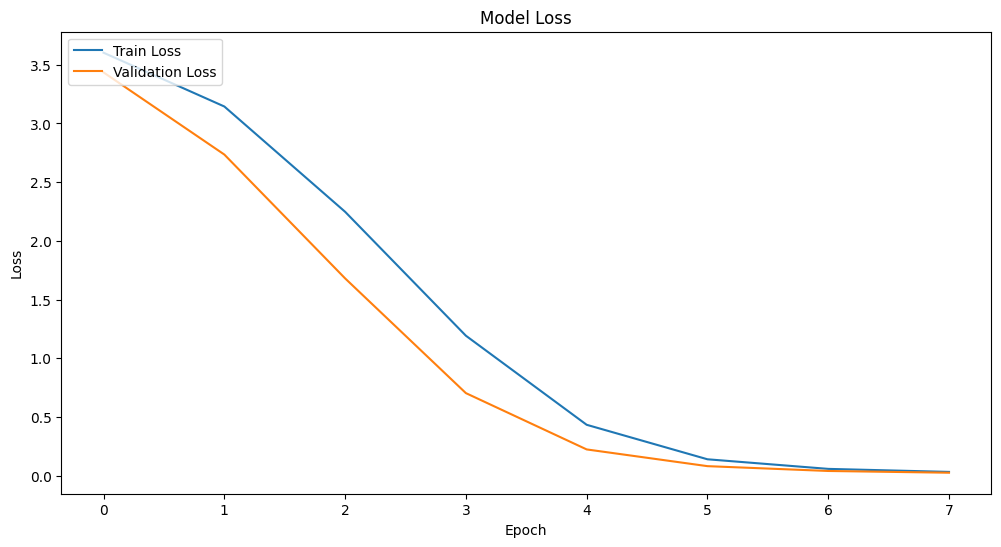

In [34]:
plot_model_accuracy(history2)
plot_model_loss(history2)

**Test second model on the test data provided to us**

In [40]:
predictions = model2.predict(X_test_final)
predicted_classes = predictions.argmax(axis=1)


class_names = y_train_enc.columns.tolist()
predicted_labels = [class_names[index] for index in predicted_classes]

predicted_labels

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo',
 'Chicken pox']

In [41]:
actual_labels = final_test_df['prognosis']
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generate a detailed classification report
class_report = classification_report(actual_labels, predicted_labels)
print("Classification Report:\n", class_report)

Accuracy: 0.9761904761904762
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67        

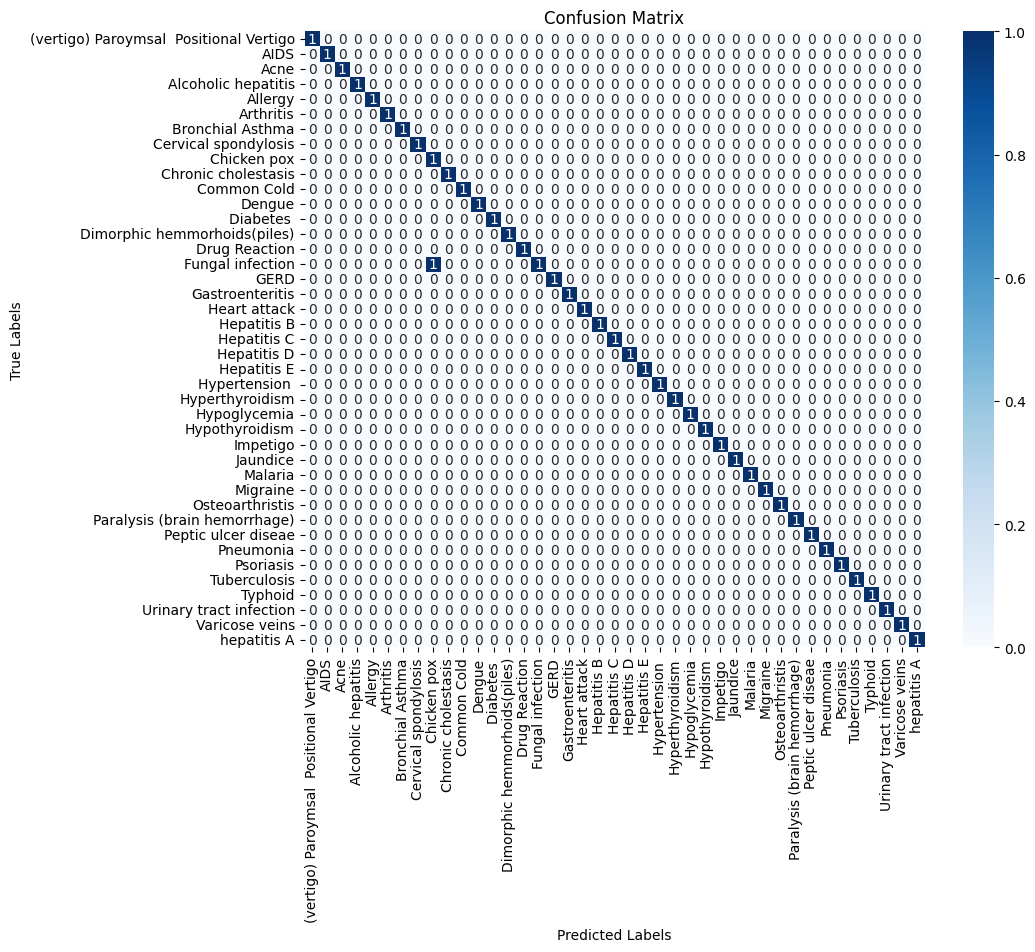

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Results

We can see that second model with more neurons, more layers, and adam optimizer performed best withe accuracy of 0.97. This model has high f1 score, recall, and precision.

**Precision**

Definition: Precision is the ratio of true positive predictions to the total number of positive predictions made (i.e., the sum of true positives and false positives). It answers the question, "Of all the diseases we predicted, how many were actually correct?"

Importance: High precision is crucial when the cost of a false positive is high. For example, if a false positive result leads to expensive, unnecessary, and potentially invasive follow-up treatments, high precision becomes important to minimize these occurrences.

**Recall (Sensitivity)**

Definition: Recall, or sensitivity, measures the proportion of actual positives that are correctly identified (i.e., the ratio of true positives to the sum of true positives and false negatives). It answers the question, "Of all the actual disease cases, how many did we correctly detect?"

Importance: Recall is particularly critical in disease prediction when missing a true case (false negative) could be life-threatening or lead to severe health complications. High recall ensures that most disease cases are caught and treated early.

**Second model addresses both recall and precision.**

# Conclusion

Deep learning has become increasingly important in disease prediction due to its ability to process and learn from vast amounts of complex, high-dimensional data, which is typical in medical contexts. Unlike traditional machine learning techniques, deep learning can automatically discover the representations needed for detection or classification from raw data, such as medical images, genetic information, or electronic health records. This capability eliminates the need for manual feature extraction, which is both labor-intensive and susceptible to human error. By leveraging deep neural networks, deep learning methods have shown exceptional performance in tasks such as diagnosing diseases from radiographic imaging, predicting patient outcomes from historical health data, and identifying novel patterns in disease progression, ultimately contributing to more accurate, personalized, and timely medical interventions

# References

https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/data

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://www.kaggle.com/code/headerstang/the-impact-of-big-data-analytics-in-healthcare

